<a href="https://colab.research.google.com/github/fdhlvidiarta/Hierarchical-Clustering/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library dan Load Dataset**
*   Mengimpor library yang digunakan untuk analisis dan visualisasi
*   Membaca dataset Mall_Customers.csv

*   Melihat 5 baris pertama data untuk memahami struktur dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('Mall_Customers.csv')

print(df.head())

# Menggunakan kolom 'Annual Income' (index 3) dan 'Spending Score' (index 4)
X = df.iloc[:, [3, 4]].values

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0          47  Female   21                99.8                    73.6
1          42    Male   35                93.6                    60.5
2          17    Male   41                17.5                    92.3
3           9    Male   30                15.0                    51.3
4          39    Male   26                77.3                     5.3


# **2. Standardisasi Fitur**
Karena skala fitur bisa berbeda, kita perlu melakukan standardisasi agar:
*   Setiap fitur memiliki skala yang sebanding
*   Algoritma clustering (berbasis jarak) bekerja lebih baik
Di sini kita menggunakan StandardScaler dari sklearn.



In [7]:
# Standardisasi fitur untuk menormalkan skala
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Asli (5 baris pertama):\n", X[:5])
print("\nData Scaled (5 baris pertama):\n", X_scaled[:5])

Data Asli (5 baris pertama):
 [[99.8 73.6]
 [93.6 60.5]
 [17.5 92.3]
 [15.  51.3]
 [77.3  5.3]]

Data Scaled (5 baris pertama):
 [[ 1.31614686  0.73230477]
 [ 1.10983339  0.31283855]
 [-1.42249813  1.3310848 ]
 [-1.50568905  0.01825158]
 [ 0.56742861 -1.45468325]]


# **3. Menentukan Jumlah Klaster dengan Dendrogram**
Sebelum memilih jumlah klaster, kita gunakan dendrogram untuk:


*   Melihat struktur pengelompokan data secara hierarkis
*   Mengestimasi jumlah klaster yang tepat
Metode yang digunakan adalah Ward linkage yang meminimalkan varians dalam klaster.



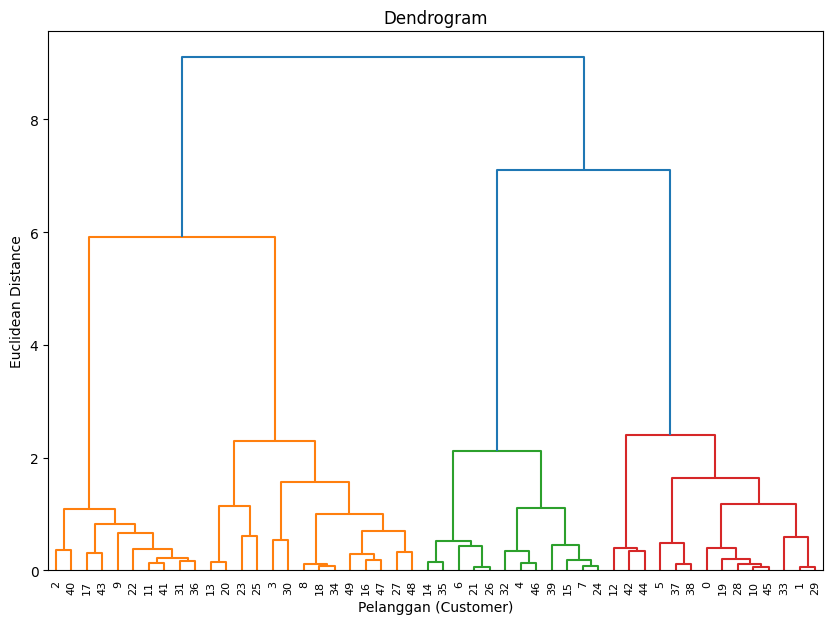

In [8]:
# MENENTUKAN JUMLAH KLASTER (DENDROGRAM)

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Pelanggan (Customer)')
plt.ylabel('Euclidean Distance')

# Membuat dendrogram menggunakan metode 'ward' (meminimalkan varians)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.show()

# **4. Melatih Model Hierarchical Clustering**
Setelah menentukan jumlah klaster (misalnya 3 klaster), kita:
*   Membuat objek AgglomerativeClustering
*   Melakukan fit & predict untuk setiap data
*   Menyimpan hasil klaster ke dalam kolom baru Cluster_Group pada dataframe

In [9]:
# MELATIH MODEL

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Melakukan fitting dan prediksi
y_hc = hc.fit_predict(X)

df['Cluster_Group'] = y_hc
print("\nHasil Pengelompokan Data:")
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_Group']].head(10))


Hasil Pengelompokan Data:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster_Group
0          47                99.8                    73.6              1
1          42                93.6                    60.5              1
2          17                17.5                    92.3              0
3           9                15.0                    51.3              0
4          39                77.3                     5.3              2
5          43                79.2                    88.1              1
6          38                96.7                    39.3              2
7          37                95.4                     6.2              2
8           5                30.2                     8.8              0
9          20                40.2                    87.8              0


# **5. Visualisasi Klaster Secara Interaktif (Plotly)**
Untuk memahami segmentasi pelanggan dengan lebih jelas, kita buat:

*   Scatter plot interaktif menggunakan Plotly
*   Sumbu X: Annual Income (k$)
*   Sumbu Y: Spending Score (1-100)
*   Warna dan simbol menunjukkan Cluster_Group
*   Hover menampilkan informasi detail seperti CustomerID, Age, dan Gender.






In [10]:
import plotly.express as px

# Ubah tipe data Cluster_Group menjadi String
df['Cluster_Group'] = df['Cluster_Group'].astype(str)

# Membuat Visualisasi Interaktif (fig)
fig = px.scatter(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Cluster_Group',
    hover_data=['CustomerID', 'Age', 'Gender'],
    title='Segmentasi Pelanggan',
    template='plotly_white',
    symbol='Cluster_Group'
)

fig.update_layout(
    legend_title_text='Kelompok',
    xaxis_title='Pendapatan Tahunan (Ribuan $)',
    yaxis_title='Skor Pengeluaran (1-100)'
)

fig.show()